# %matplotlib inline
import os
import numpy as np
import pandas as pd
import pyGadget
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
mpl.rc('text', usetex=True)

# Sink Accretion History

In [3]:
simname = {'vanilla':r'$u_{\rm \tiny CR} = 0$',
        'cr00': r'$u_{\rm \tiny CR} = u_0$', 
        'cr01': r'$u_{\rm \tiny CR} = 10 u_0$', 
        'cr02': r'$u_{\rm \tiny CR} = 10^2 u_0$', 
        'cr03': r'$u_{\rm \tiny CR} = 10^3 u_0$', 
        'cr04': r'$u_{\rm \tiny CR} = 10^4 u_0$',
        'cr05': r'$u_{\rm \tiny CR} = 10^5 u_0$',
        'halo2': r'Halo 2'}
name = ['vanilla', 'cr00', 'cr01', 'cr02', 'cr03', 'cr04', 'cr05']

In [14]:
sinkdata = pd.HDFStore(os.getenv("HOME")+'/data/stampede/sinkdata.hdf5')
dataV = sinkdata['vanilla']
dataV2 = sinkdata['halo2_vanilla']
data0 = sinkdata['halo1_cr00']
data1 = sinkdata['halo1_cr01']
data2 = sinkdata['halo1_cr02']
data3 = sinkdata['halo1_cr03']
data4 = sinkdata['halo1_cr04']
data5 = sinkdata['halo1_cr05']
sinkdata.close()

In [16]:
sinksV = dataV.set_index('time')
sinksV2 = dataV2.set_index('time')
sinks0 = data0.set_index('time')
sinks1 = data1.set_index('time')
sinks2 = data2.set_index('time')
sinks3 = data3.set_index('time')
sinks4 = data4.set_index('time')
sinks5 = data5.set_index('time')

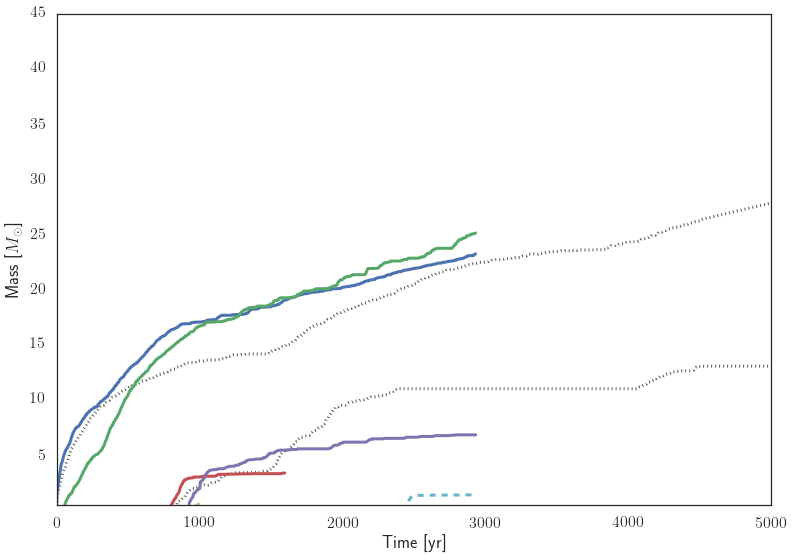

In [23]:
fig = plt.figure(1)
ax = fig.add_subplot(111)


slw = 3
sls = ['-', '--', '-.', ':']


for sinkID in sinksV.ID.unique():
    growth = sinksV[sinksV.ID == sinkID]['mass']
    ax = growth.plot(ax=ax, grid=False, lw=3, ls=':', color='.35')
sinkset = sinksV2
for j,sinkID in enumerate(sinkset.ID.unique()):
    growth = sinkset[sinkset.ID == sinkID]['mass']
    ax = growth.plot(ax=ax, grid=False, lw=3, ls=sls[j/4])

ax.set_xlim(0,5000)
ax.set_ylim(.5,45)
#ax0.set_yticks((5,10,15,20,25,30, 35, 40, 45))
#ax3.set_yticks((5,10,15,20,25, 30, 35, 40))

ax.set_ylabel('Mass [$M_{\odot}$]')
ax.set_xlabel('Time [yr]')


#plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/sinks/sink_masses_halo2.png', bbox_inches='tight')
plt.show()

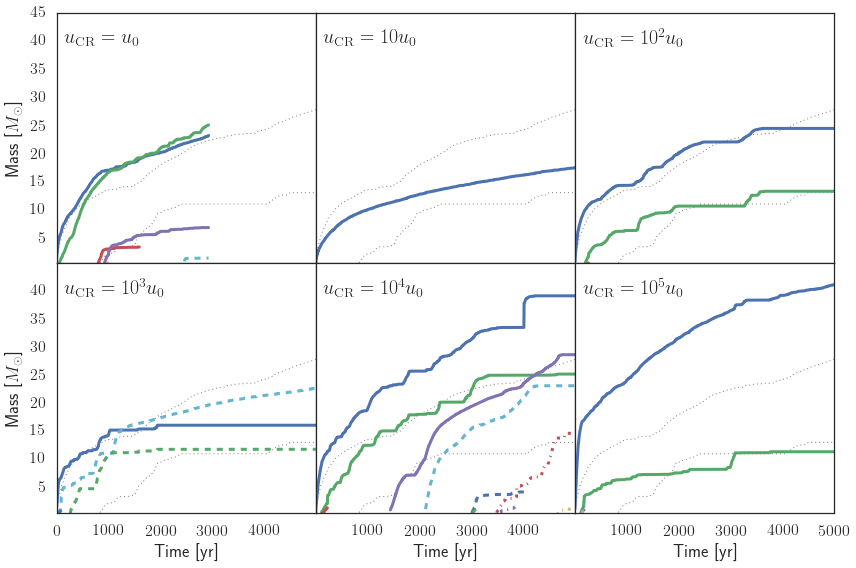

In [6]:
fig = plt.figure(2, figsize=(12,8))
ax0 = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)



slw = 3
sls = ['-', '--', '-.', ':']

for i, (ax, sinkset) in enumerate([(ax0,sinks0), (ax1,sinks1), (ax2,sinks2), (ax3,sinks3), (ax4,sinks4), (ax5,sinks5)]):
    for sinkID in sinksV.ID.unique():
        growth = sinksV[sinksV.ID == sinkID]['mass']
        ax = growth.plot(ax=ax, grid=False, lw=1, ls=':', color='grey')
    for j,sinkID in enumerate(sinkset.ID.unique()):
        growth = sinkset[sinkset.ID == sinkID]['mass']
        ax = growth.plot(ax=ax, grid=False, lw=3, ls=sls[j/4])
    ax.text(.03,.93, simname[name[i+1]], ha='left', va='top', size=20, transform=ax.transAxes)

        

ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax5.yaxis.set_visible(False)


for ax in fig.axes:
    ax.set_xlim(0,5000)
    ax.set_ylim(.5,45)
ax0.set_yticks((5,10,15,20,25,30, 35, 40, 45))
ax3.set_yticks((5,10,15,20,25, 30, 35, 40))
ax3.set_xticks((0,1000,2000,3000,4000))
ax4.set_xticks((1000,2000,3000,4000))
ax5.set_xticks((1000,2000,3000,4000,5000))

ax0.set_ylabel('Mass [$M_{\odot}$]')
ax3.set_ylabel('Mass [$M_{\odot}$]')
ax3.set_xlabel('Time [yr]')
ax4.set_xlabel('Time [yr]')
ax5.set_xlabel('Time [yr]')


plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/sinks/sink_masses2.png', bbox_inches='tight')
plt.show()

In [7]:
total_mass = []
for i,data in enumerate([dataV, data0, data1, data2, data3, data4, data5]):
    mtot = data[['time','mass']].groupby('time').sum()
    mtot.rename(columns = {'mass':simname[name[i]]}, inplace=True)
    total_mass.append(mtot)

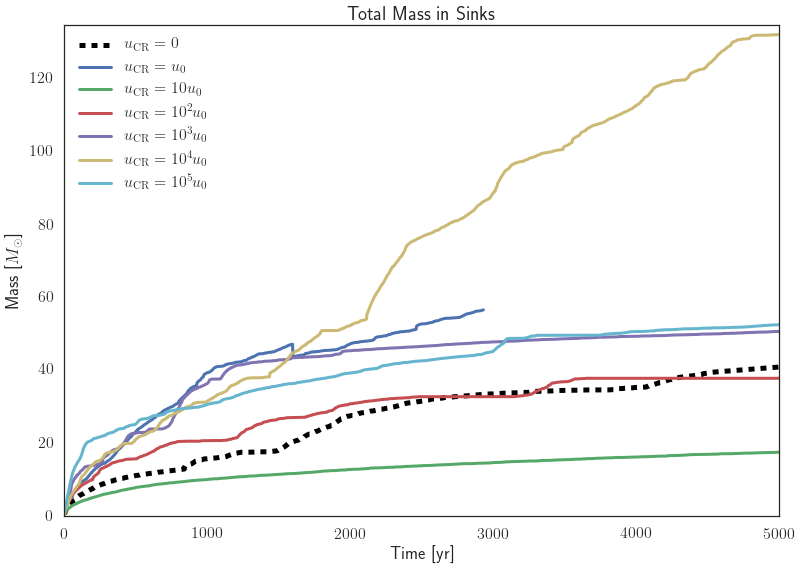

In [8]:
slw = 3
sls = ['-', '--', '-.', ':']
count = 0
plt.figure()
ax = plt.gca()
total_mass[0].plot(ax=ax, grid=False, lw=5, ls='--', color='k')
for i,mtot in enumerate(total_mass[1:]):
    mtot.plot(ax=ax, grid=False, lw=slw)
    
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,135)

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Total Mass in Sinks')
plt.savefig('figures/sinks/total_sink_mass2.png', bbox_inches='tight')

In [9]:
most_massive_sink = []
for i,data in enumerate([dataV, data0, data1, data2, data3, data4, data5]):
    mms = data[['time','mass']].groupby('time').max()
    mms.rename(columns = {'mass':simname[name[i]]}, inplace=True)
    most_massive_sink.append(mms)

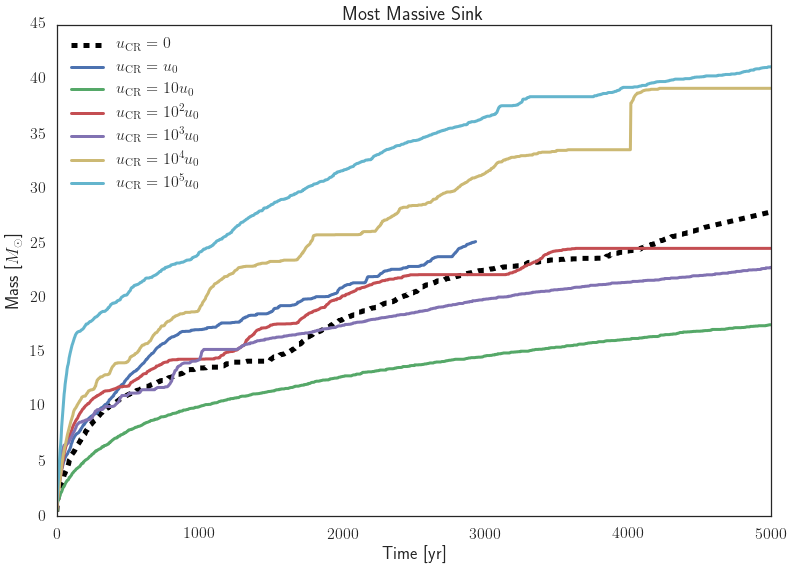

In [10]:
slw = 3
count = 0
plt.figure()
ax = plt.gca()
most_massive_sink[0].plot(ax=ax, grid=False, lw=5, ls='--', color='k')
for i,mms in enumerate(most_massive_sink[1:]):
    mms.plot(ax=ax, grid=False, lw=slw)
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,45)

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Most Massive Sink')
plt.savefig('figures/sinks/most_massive_sink2.png', bbox_inches='tight')